**Nama: Riski Abdi Rahmawan**

**Kelas: TI-3E**

**NIM: 2241720060**

**Absen: 25**

#**Praktikum 1**

**K-Means**

In [ ]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/content/drive/MyDrive/Machine Learning/assets/iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Kode di atas mengimpor pustaka-pustaka yang digunakan untuk analisis data dan pembelajaran mesin, seperti Pandas untuk pengelolaan data, NumPy untuk perhitungan numerik, Matplotlib untuk visualisasi, serta KMeans dari Scikit-learn untuk melakukan klasterisasi. Setelah itu, dataset berformat CSV yang berisi data iris diambil dari Google Drive dan dimuat ke dalam DataFrame Pandas. DataFrame ini disimpan dalam variabel df, yang berfungsi sebagai struktur data untuk menyimpan dataset tersebut. Dengan menggunakan fungsi df.head(), lima baris pertama dari dataset ditampilkan untuk memudahkan kita melihat sekilas data yang dimuat.

In [ ]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

Kode ini melakukan proses seleksi fitur dengan memisahkan data menjadi dua variabel, yaitu `X` untuk fitur input dan `y` untuk label output. Pada variabel `X`, dipilih semua kolom dari indeks pertama hingga kolom sebelum terakhir menggunakan metode `.iloc[:, 1:-1]`. Artinya, kolom pertama (biasanya berisi ID atau informasi yang tidak diperlukan) tidak diikutsertakan, dan hanya kolom-kolom yang berisi fitur yang dipilih. Sedangkan variabel `y` mengambil kolom terakhir dari dataset dengan `df.iloc[:, -1]`, yang kemungkinan berisi label atau kategori spesies bunga iris yang akan diprediksi. Dengan demikian, data dipecah menjadi fitur dan label yang siap digunakan untuk model machine learning.

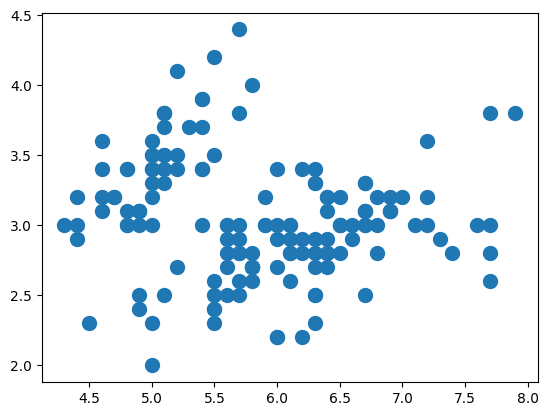

In [ ]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

Kode ini digunakan untuk memvisualisasikan data dalam bentuk scatter plot, dengan fokus hanya pada dua fitur dari dataset, yaitu **Sepal Length** dan **Sepal Width**. Meskipun dataset tersebut memiliki empat fitur (dimensi), kode ini hanya memilih dua fitur untuk diplot. Fungsi `plt.scatter()` digunakan untuk membuat grafik sebar, di mana `X.iloc[:, 0]` mewakili kolom pertama (Sepal Length) sebagai sumbu-x dan `X.iloc[:, 1]` mewakili kolom kedua (Sepal Width) sebagai sumbu-y. Parameter `s = 100` digunakan untuk mengatur ukuran titik-titik pada grafik agar lebih mudah dilihat. Scatter plot ini membantu memvisualisasikan distribusi data dan potensi pola atau kelompok berdasarkan dua fitur tersebut.

In [ ]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

Kode ini digunakan untuk membuat model klasterisasi K-Means, dengan asumsi kita tidak mengetahui jumlah label sebenarnya dalam dataset (yang seharusnya ada tiga). Kelas `KMeans` dari pustaka `scikit-learn` diimpor dan diinisialisasi dengan parameter `n_clusters=2`, yang berarti model akan membagi data ke dalam dua kelompok. Model K-Means ini kemudian dilatih menggunakan data fitur `X` dengan metode `fit`, dan sekaligus memprediksi kelompok (cluster) dari setiap data menggunakan metode `predict`. Hasil prediksi ini disimpan dalam variabel `y_kmeans`, yang berisi label cluster untuk masing-masing data. Kode ini secara otomatis mengelompokkan data berdasarkan kemiripannya dalam dua cluster tanpa memperhatikan label aslinya.

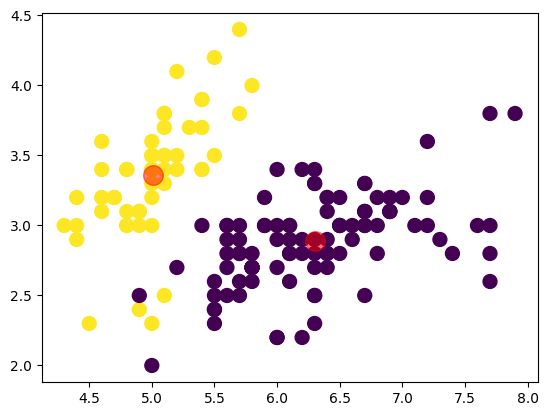

In [ ]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

Kode ini digunakan untuk memvisualisasikan hasil klasterisasi K-Means berdasarkan dua fitur, **Sepal Length** dan **Sepal Width**. Pertama, scatter plot dibuat menggunakan `plt.scatter()`, di mana fitur **Sepal Length** digunakan sebagai sumbu-x dan **Sepal Width** sebagai sumbu-y. Ukuran titik-titik diatur menjadi 100, dan setiap titik diberi warna sesuai dengan hasil klasterisasi yang tersimpan dalam variabel `y_kmeans`. Warna ini menunjukkan klaster (kelompok) yang berbeda. Selanjutnya, centroid (pusat klaster) diperoleh menggunakan `cl_kmeans.cluster_centers_` dan ditampilkan dalam plot dengan warna merah, ukuran lebih besar (200), serta sedikit transparan (alpha=0.5). Centroid ini menandai titik pusat dari masing-masing klaster yang telah dihitung oleh algoritma K-Means.

In [ ]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


Kode ini digunakan untuk mengecek nilai **Sum of Squared Errors (SSE)** dari model K-Means yang telah dilatih. Dengan menggunakan perintah `print(f'Nilai SSE: {cl_kmeans.inertia_}')`, kode ini mencetak nilai SSE yang dihitung oleh model. SSE, yang juga dikenal sebagai **inertia**, merupakan ukuran yang menunjukkan seberapa baik data dikelompokkan dalam klaster yang dihasilkan. Semakin rendah nilai SSE, semakin baik pemisahan data dalam klaster, karena ini menunjukkan bahwa titik-titik data lebih dekat ke centroid klaster masing-masing. Dengan mengakses `cl_kmeans.inertia_`, kita dapat memperoleh nilai ini secara langsung setelah model dilatih, sehingga hasil cetakan tersebut memberikan gambaran mengenai kinerja klasterisasi yang dilakukan oleh model K-Means.

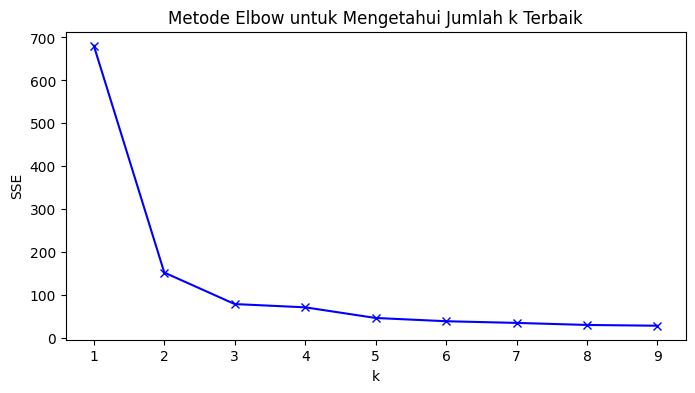

In [ ]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

Kode ini menerapkan metode **Elbow** untuk menentukan jumlah klaster yang optimal (k terbaik) untuk model K-Means. Pertama, kode ini menginisialisasi list kosong bernama `sse`, yang digunakan untuk menyimpan nilai Sum of Squared Errors (SSE) untuk setiap nilai k yang diuji. Selanjutnya, variabel `K` didefinisikan sebagai rentang nilai dari 1 hingga 9, mewakili jumlah klaster yang akan diuji. Dalam loop `for` yang berjalan untuk setiap nilai k dalam rentang K, model K-Means diinisialisasi dengan jumlah klaster yang sesuai dan dilatih menggunakan data fitur `X`. Setelah model dilatih, nilai SSE (inertia) disimpan dalam list `sse`.

Setelah semua nilai SSE untuk berbagai k dihitung, kode ini membuat plot untuk menggambarkan hubungan antara jumlah klaster (k) dan nilai SSE. Ukuran plot diatur menggunakan `plt.figure()`, dan grafik digambar dengan `plt.plot()`, di mana `K` berfungsi sebagai sumbu-x dan `sse` sebagai sumbu-y. Label sumbu dan judul grafik ditambahkan untuk memberikan penjelasan. Akhirnya, `plt.show()` digunakan untuk menampilkan grafik yang menunjukkan bagaimana nilai SSE berubah seiring dengan jumlah klaster yang diuji. Dengan plot ini, kita dapat mengidentifikasi titik "elbow" yang menunjukkan jumlah klaster optimal di mana penurunan nilai SSE mulai melambat. Secara keseluruhan, kode ini membantu dalam menentukan jumlah klaster terbaik untuk model K-Means menggunakan metode Elbow.

In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94506582597728
k=4; SSE=71.34044682436698
k=5; SSE=46.535582051282034
k=6; SSE=38.95373036498037
k=7; SSE=35.04275995246584
k=8; SSE=30.276436720142613
k=9; SSE=28.48921112003963


Kode ini digunakan untuk mencetak nilai **Sum of Squared Errors (SSE)** untuk setiap jumlah klaster (k) yang telah diuji dalam proses klasterisasi K-Means. Dengan menggunakan fungsi `enumerate()`, kode ini mengiterasi melalui list `sse`, yang berisi nilai SSE untuk setiap k. Fungsi ini memberikan indeks (`idx`) dan nilai SSE (`sse_val`) untuk setiap elemen dalam list. Di dalam loop, perintah `print(f'k={idx}; SSE={sse_val}')` mencetak nilai k dan nilai SSE yang bersesuaian, dengan parameter `start=1` pada `enumerate()` memastikan bahwa indeks mulai dari 1. Dengan demikian, output yang dihasilkan lebih intuitif, mencerminkan jumlah klaster yang diuji. Secara keseluruhan, kode ini memberikan ringkasan mengenai nilai SSE untuk setiap jumlah klaster yang diuji, membantu pengguna memahami seberapa baik pemisahan data berdasarkan klaster yang berbeda dan menganalisis hasil dari metode Elbow yang telah diterapkan.

#**Praktikum 2**

**Konsep K-Means untuk klasterisasi data**

**Import Library**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

Kode ini mengimpor pustaka yang diperlukan untuk visualisasi data dan pengolahan angka dalam Python. Pertama, **`import matplotlib.pyplot as plt`** mengimpor modul `pyplot` dari pustaka `matplotlib`, yang merupakan pustaka utama untuk membuat grafik dan visualisasi data. Dengan menggunakan alias `plt`, pengguna dapat dengan mudah mengakses berbagai fungsi untuk membuat berbagai jenis plot. Selanjutnya, **`import seaborn as sns; sns.set()`** mengimpor pustaka `seaborn`, yang menyediakan antarmuka yang lebih tinggi untuk visualisasi statistik yang menarik dan informatif. Dengan memanggil `sns.set()`, pengguna mengatur gaya default dari plot yang dihasilkan, sehingga tampilan grafik menjadi lebih estetis dan konsisten. Terakhir, **`import numpy as np`** mengimpor pustaka `numpy`, yang merupakan pustaka fundamental untuk komputasi ilmiah di Python. Pustaka ini menawarkan dukungan untuk array multidimensi dan berbagai fungsi matematika yang efisien, dengan menggunakan alias `np` untuk mempermudah akses ke fungsi dan metode yang tersedia. Secara keseluruhan, kode ini mempersiapkan lingkungan yang diperlukan untuk melakukan visualisasi data dengan `matplotlib` dan `seaborn`, serta pengolahan data numerik dengan `numpy`.

**Pengantar k-Means**

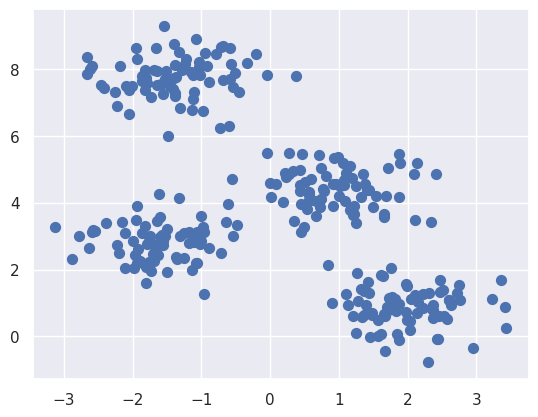

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

Kode ini digunakan untuk membuat dataset sintetis yang terdiri dari beberapa klaster menggunakan pustaka `sklearn` dan memvisualisasikannya dengan `matplotlib`. Pertama, kode ini mengimpor fungsi `make_blobs` dari modul `datasets` dalam pustaka `sklearn`, yang digunakan untuk menghasilkan dataset sintetis yang terdiri dari klaster-klaster. Selanjutnya, fungsi `make_blobs` dipanggil dengan parameter `n_samples=300`, yang menentukan bahwa dataset akan memiliki 300 titik data, dan `centers=4`, yang menunjukkan bahwa akan ada 4 klaster yang berbeda. Parameter `cluster_std=0.60` mengatur deviasi standar dari setiap klaster, mempengaruhi sebaran titik data di dalam klaster tersebut. Parameter `random_state=0` digunakan untuk memastikan bahwa hasil yang dihasilkan bersifat reproduktif, sehingga setiap kali kode dijalankan, dataset yang dihasilkan akan tetap sama. Variabel `X` menyimpan koordinat titik data, sementara `y_true` menyimpan label klaster yang benar untuk masing-masing titik.

Terakhir, kode ini menggunakan fungsi `scatter` dari `matplotlib` untuk membuat plot sebar dari dataset yang telah dibuat. Dengan mengambil nilai dari `X[:, 0]` untuk sumbu-x dan `X[:, 1]` untuk sumbu-y, serta menentukan ukuran titik dengan parameter `s=50`, titik-titik data dari dataset akan divisualisasikan dalam dua dimensi, menunjukkan distribusi dari klaster yang telah dihasilkan. Secara keseluruhan, kode ini menghasilkan dataset sintetis dengan 4 klaster dan memvisualisasikannya dalam bentuk scatter plot.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Kode ini digunakan untuk menerapkan algoritma klasterisasi K-Means pada dataset yang telah dibuat sebelumnya. Pertama, kode ini mengimpor kelas `KMeans` dari modul `cluster` dalam pustaka `sklearn`, yang memungkinkan pengguna untuk menerapkan algoritma K-Means, metode populer untuk klasterisasi data. Selanjutnya, objek `kmeans` dibuat dengan menginisialisasi kelas `KMeans` dan menentukan jumlah klaster yang diinginkan, yaitu 4, dengan parameter `n_clusters=4`. Dengan memanggil metode `.fit(X)`, model K-Means dilatih menggunakan dataset `X`, yang berisi titik-titik data. Proses ini melibatkan pengelompokan titik-titik data ke dalam klaster berdasarkan kedekatannya dengan centroid klaster yang dihitung selama pelatihan.

Setelah model dilatih, metode `.predict(X)` digunakan untuk mengklasifikasikan setiap titik data dalam dataset ke dalam klaster yang sesuai. Hasil prediksi ini disimpan dalam variabel `y_kmeans`, yang berisi label klaster untuk masing-masing titik data. Secara keseluruhan, kode ini menerapkan algoritma K-Means untuk mengelompokkan dataset yang telah dibuat menjadi 4 klaster, serta menyimpan hasil prediksi klaster dalam variabel `y_kmeans`.

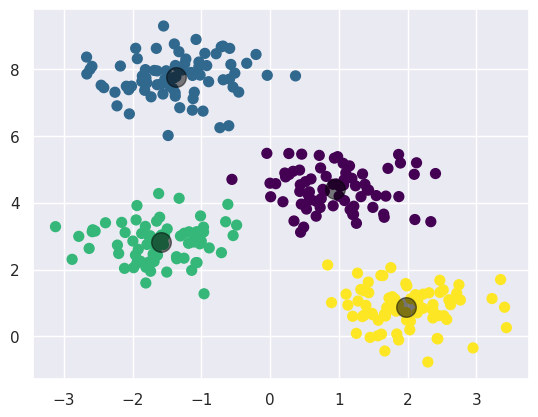

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

Kode ini digunakan untuk memvisualisasikan hasil klasterisasi K-Means yang diterapkan pada dataset sebelumnya. Pertama, fungsi `plt.scatter()` digunakan untuk membuat plot sebar dari titik-titik data, di mana `X[:, 0]` dan `X[:, 1]` mewakili sumbu-x dan sumbu-y. Parameter `c=y_kmeans` mengatur warna titik berdasarkan label klaster yang dihasilkan oleh model K-Means, sedangkan `s=50` menentukan ukuran titik dan `cmap='viridis'` memilih palet warna yang akan digunakan. Selanjutnya, centroid klaster dihitung menggunakan `kmeans.cluster_centers_`, dan titik-titik pusat klaster ini juga divisualisasikan dengan `plt.scatter()`. Titik pusat ditampilkan dalam warna hitam dengan ukuran lebih besar (`s=200`) dan transparansi (`alpha=0.5`), yang membuatnya mudah terlihat di atas titik data lainnya. Dengan demikian, kode ini memberikan gambaran yang jelas tentang bagaimana titik data dikelompokkan ke dalam klaster dan posisi centroid masing-masing klaster.

**Algoritma Expectation-Maximization**

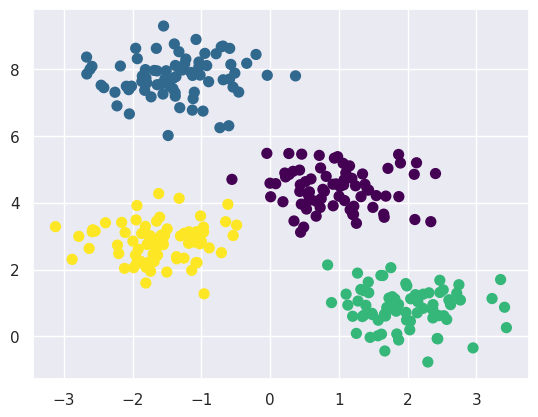

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

Kode ini mendefinisikan fungsi `find_clusters`, yang mengimplementasikan algoritma klasterisasi K-Means secara manual. Fungsi ini menerima data input `X`, jumlah klaster yang diinginkan `n_clusters`, dan parameter acak `rseed` untuk memastikan hasil yang dapat direproduksi. Pertama, fungsi memilih secara acak titik data sebagai centroid awal. Kemudian, dalam loop iteratif, fungsi menghitung label untuk setiap titik data berdasarkan centroid terdekat, memperbarui centroid dengan menghitung rata-rata posisi titik data yang memiliki label yang sama, dan memeriksa konvergensi hingga centroid tidak berubah. Setelah konvergensi tercapai, fungsi mengembalikan centroid dan label klaster. Hasil klasterisasi kemudian divisualisasikan dengan `plt.scatter()`, di mana warna titik ditentukan oleh label klaster, memberikan gambaran jelas tentang pengelompokan data dalam plot.

**Perubahan random**

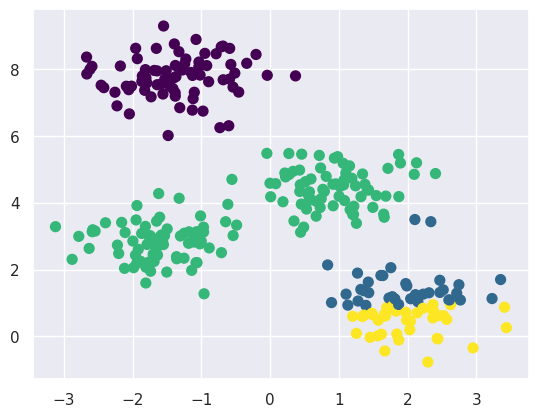

In [ ]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

Kode ini memanggil fungsi `find_clusters` dengan data input `X`, menetapkan jumlah klaster menjadi 4, dan menggunakan `rseed=0` untuk memastikan hasil yang dapat direproduksi. Hasil dari fungsi ini disimpan dalam variabel `centers` dan `labels`. Setelah mendapatkan centroid klaster dan label untuk setiap titik data, kode ini kemudian memvisualisasikan hasil klasterisasi dengan menggunakan `plt.scatter()`. Dalam visualisasi ini, titik data ditampilkan dengan warna yang ditentukan oleh label klaster yang dihasilkan, ukuran titik diatur ke 50, dan palet warna 'viridis' digunakan. Dengan demikian, pengguna dapat melihat bagaimana titik-titik data dikelompokkan ke dalam klaster yang berbeda pada plot.

**Optimalisasi Jumlah Klaster**

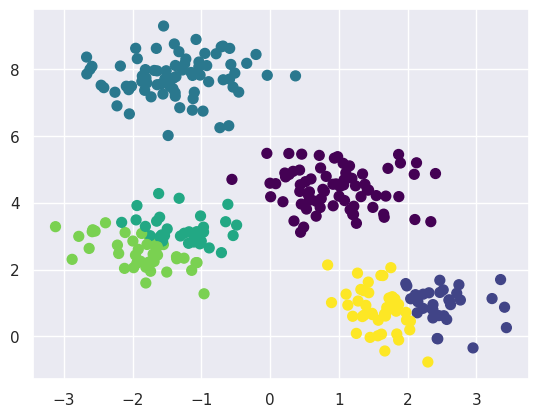

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Kode ini menerapkan algoritma klasterisasi K-Means pada dataset `X` dengan jumlah klaster ditentukan sebanyak 6. Pertama, objek `KMeans` diinisialisasi dengan parameter `n_clusters=6` dan `random_state=0`, yang memastikan hasil yang dapat direproduksi. Metode `fit_predict()` kemudian digunakan untuk melatih model pada dataset `X` dan sekaligus menghasilkan label klaster untuk setiap titik data, yang disimpan dalam variabel `labels`. Setelah mendapatkan label klaster, kode ini memvisualisasikan hasil klasterisasi menggunakan `plt.scatter()`, di mana warna titik data ditentukan oleh label klaster yang dihasilkan, ukuran titik diatur ke 50, dan palet warna 'viridis' digunakan. Dengan demikian, pengguna dapat melihat bagaimana titik-titik data dikelompokkan ke dalam 6 klaster yang berbeda pada plot.

**Batas Klaster yang Tidak Selalu Linier**

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

Kode ini digunakan untuk menghasilkan dataset sintetis berbentuk bulan sabit (moons) menggunakan fungsi `make_moons` dari pustaka `sklearn.datasets`. Fungsi ini dipanggil dengan parameter `200`, yang menunjukkan bahwa dataset akan terdiri dari 200 titik data, dan `noise=0.05`, yang menambahkan sedikit gangguan (noise) pada data agar lebih realistis dan mencerminkan data yang mungkin ditemukan di dunia nyata. Parameter `random_state=0` digunakan untuk memastikan bahwa hasil yang dihasilkan bersifat reproduktif, sehingga setiap kali kode dijalankan, dataset yang dihasilkan akan tetap sama. Variabel `X` menyimpan koordinat titik data, sementara `y` menyimpan label untuk setiap titik data, yang menunjukkan kelompok mana titik data tersebut termasuk. Secara keseluruhan, kode ini menciptakan dataset dua dimensi yang terdiri dari dua bentuk bulan sabit yang saling berinteraksi, dengan sedikit noise untuk menciptakan variasi.

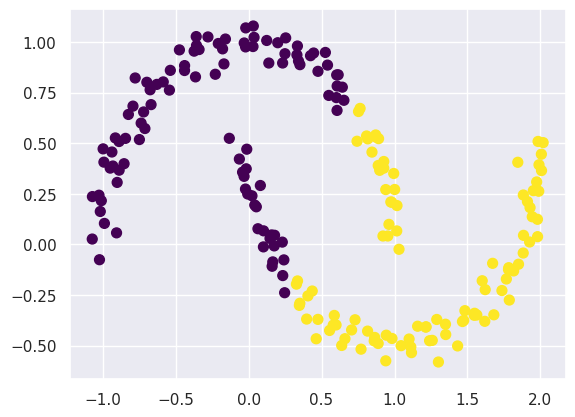

In [ ]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

Kode ini menerapkan algoritma klasterisasi K-Means pada dataset bulan sabit (`X`) dengan jumlah klaster ditentukan sebanyak 2. Pertama, objek `KMeans` diinisialisasi dengan parameter `n_clusters=2` dan `random_state=0`, yang memastikan bahwa hasil klasterisasi dapat direproduksi. Metode `fit_predict()` kemudian digunakan untuk melatih model pada dataset `X` dan sekaligus menghasilkan label klaster untuk setiap titik data, yang disimpan dalam variabel `labels`. Setelah mendapatkan label klaster, kode ini memvisualisasikan hasil klasterisasi dengan menggunakan `plt.scatter()`, di mana warna titik data ditentukan oleh label klaster yang dihasilkan, ukuran titik diatur ke 50, dan palet warna 'viridis' digunakan. Dengan demikian, pengguna dapat melihat bagaimana titik-titik data dikelompokkan menjadi dua klaster yang berbeda pada plot, meskipun bentuk data bulan sabit mungkin menyulitkan pemisahan yang sempurna.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


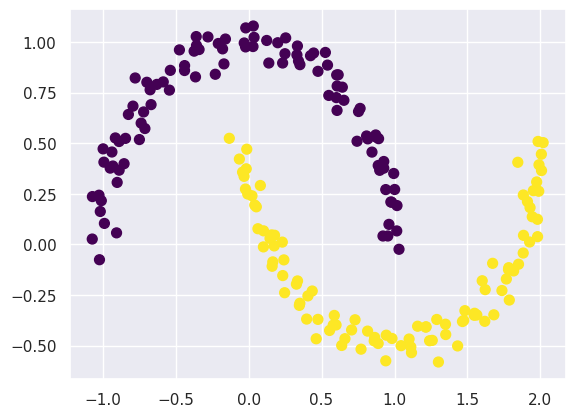

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Kode ini menerapkan algoritma klasterisasi Spektral pada dataset bulan sabit (`X`) dengan jumlah klaster yang ditentukan sebanyak 2. Pertama, objek `SpectralClustering` diinisialisasi dengan parameter `n_clusters=2`, yang menunjukkan bahwa data akan dikelompokkan menjadi dua klaster. Parameter `affinity='nearest_neighbors'` digunakan untuk menentukan cara menghitung kedekatan antara titik data, yaitu dengan menggunakan tetangga terdekat. Selain itu, `assign_labels='kmeans'` menunjukkan bahwa label klaster akan ditentukan menggunakan algoritma K-Means.

Setelah mengatur model, metode `fit_predict()` digunakan untuk melatih model pada dataset `X` dan menghasilkan label klaster untuk setiap titik data, yang disimpan dalam variabel `labels`. Kode ini kemudian memvisualisasikan hasil klasterisasi menggunakan `plt.scatter()`, di mana warna titik data ditentukan oleh label klaster yang dihasilkan, ukuran titik diatur ke 50, dan palet warna 'viridis' digunakan. Dengan demikian, pengguna dapat melihat bagaimana algoritma klasterisasi Spektral membagi titik-titik data menjadi dua klaster yang berbeda pada plot, yang lebih baik dalam menangani struktur non-linear seperti bentuk bulan sabit dibandingkan dengan K-Means.

**Contoh Kasus 1: Karakter Angka**

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Kode ini mengimpor fungsi `load_digits` dari pustaka `sklearn.datasets`, yang digunakan untuk memuat dataset digit tangan yang terkenal. Dataset ini berisi gambar-gambar angka tulisan tangan (0 hingga 9) yang telah diproses menjadi format numerik. Ketika fungsi `load_digits()` dipanggil, dataset dimuat ke dalam variabel `digits`, yang merupakan objek dengan beberapa atribut, termasuk `data`, yang berisi fitur dari setiap gambar.

Setelah memuat dataset, kode ini mengekstrak bentuk (shape) dari array `digits.data` menggunakan `digits.data.shape`. Atribut ini memberikan informasi tentang dimensi array fitur, yang menunjukkan jumlah gambar dan jumlah fitur (piksel) per gambar. Secara umum, dataset ini memiliki 1797 gambar, masing-masing terdiri dari 64 fitur (8x8 piksel). Hasil dari kode ini akan menunjukkan bentuk array, misalnya `(1797, 64)`, yang berarti terdapat 1797 gambar dengan 64 fitur setiap gambar.

In [ ]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

Kode ini menerapkan algoritma klasterisasi K-Means pada dataset digit tangan yang telah dimuat sebelumnya. Pertama, objek `KMeans` diinisialisasi dengan parameter `n_clusters=10`, yang menunjukkan bahwa dataset akan dikelompokkan menjadi 10 klaster, sesuai dengan jumlah angka (0-9) yang terdapat dalam dataset. Parameter `random_state=0` digunakan untuk memastikan bahwa hasil klasterisasi dapat direproduksi.

Metode `fit_predict()` kemudian dipanggil pada `digits.data`, yang berisi fitur dari gambar angka. Metode ini melatih model K-Means pada data dan sekaligus menghasilkan label klaster untuk setiap gambar, yang disimpan dalam variabel `clusters`.

Selanjutnya, kode ini memeriksa bentuk dari `kmeans.cluster_centers_` menggunakan `.shape`. Atribut `cluster_centers_` memberikan posisi centroid untuk setiap klaster yang telah ditemukan. Dengan menggunakan `.shape`, pengguna dapat mengetahui berapa banyak fitur yang ada di setiap centroid. Dalam konteks dataset digit, hasilnya akan menunjukkan bentuk array centroid, yang seharusnya berupa `(10, 64)`, di mana 10 adalah jumlah klaster (satu untuk setiap digit), dan 64 adalah jumlah fitur (piksel) per gambar.

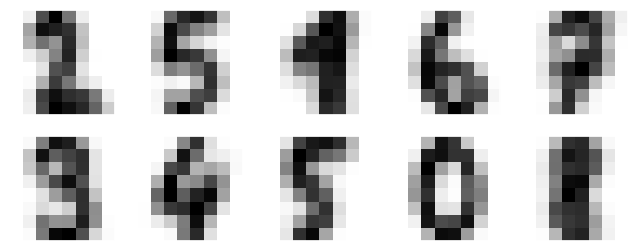

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Kode ini digunakan untuk memvisualisasikan centroid dari klaster yang dihasilkan oleh algoritma K-Means pada dataset digit tangan. Pertama, objek `fig` dan `ax` dibuat untuk menghasilkan 10 subplot dalam 2 baris dan 5 kolom. Centroid klaster diambil dari `kmeans.cluster_centers_` dan diubah bentuknya menjadi 10 centroid berukuran 8x8.

Selanjutnya, dalam loop, setiap centroid ditampilkan di subplot yang sesuai. Sumbu x dan y dihapus agar subplot lebih bersih, lalu `imshow()` digunakan untuk menampilkan centroid dalam format gambar dengan palet warna biner (hitam-putih). Dengan demikian, visualisasi ini menunjukkan bentuk rata-rata dari setiap digit yang dikelompokkan oleh K-Means, memudahkan pengguna untuk melihat representasi angka dalam setiap klaster.

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Kode ini mengonversi label klaster yang dihasilkan oleh K-Means menjadi label yang lebih bermakna berdasarkan target sebenarnya dalam dataset digit tangan. Pertama, sebuah array `labels` diinisialisasi dengan nol dan memiliki ukuran yang sama dengan `clusters`.

Kemudian, dalam loop yang melalui setiap klaster (0 hingga 9), kode ini membuat `mask` untuk memilih elemen dalam `clusters` yang sesuai dengan klaster saat ini. Fungsi `mode()` digunakan untuk menemukan label target yang paling umum dalam klaster tersebut dan hasilnya disimpan dalam array `labels`. Dengan cara ini, setiap label klaster diubah menjadi label yang sesuai dengan angka sebenarnya, sehingga hasilnya lebih informatif.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

Kode ini digunakan untuk menghitung akurasi dari model klasterisasi K-Means setelah label klaster telah diperbarui untuk mencocokkan label sebenarnya dari dataset digit tangan. Fungsi `accuracy_score` dari pustaka `sklearn.metrics` digunakan untuk membandingkan dua array: `digits.target`, yang berisi label sebenarnya dari angka (0-9), dan `labels`, yang berisi label klaster yang telah diperbarui.

Dengan memanggil `accuracy_score(digits.target, labels)`, kode ini menghitung persentase label yang diprediksi dengan benar dibandingkan dengan label sebenarnya. Hasil dari fungsi ini akan memberikan nilai akurasi, yang menunjukkan seberapa baik model klasterisasi K-Means dalam mengelompokkan gambar angka ke dalam klaster yang sesuai.

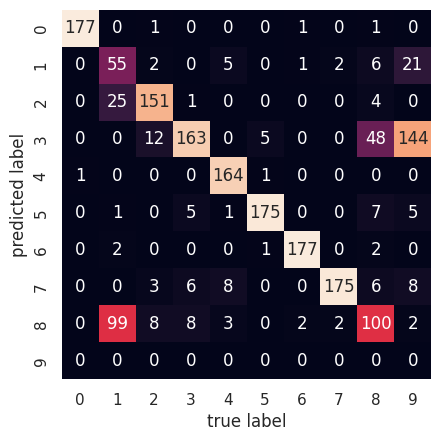

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Kode ini digunakan untuk menghasilkan matriks kebingungan (confusion matrix) untuk menganalisis kinerja model klasterisasi K-Means setelah label klaster diperbarui. Pertama, fungsi `confusion_matrix` dari pustaka `sklearn.metrics` digunakan untuk menghitung matriks kebingungan dengan membandingkan `digits.target`, yang berisi label sebenarnya, dan `labels`, yang berisi label klaster yang telah diperbarui. Hasilnya disimpan dalam variabel `mat`.

Selanjutnya, `sns.heatmap()` dari pustaka Seaborn digunakan untuk memvisualisasikan matriks kebingungan dalam bentuk heatmap. Parameter `mat.T` mentranspos matriks agar sumbu x mewakili label sebenarnya dan sumbu y mewakili label prediksi. Beberapa opsi tambahan digunakan, seperti `annot=True` untuk menampilkan nilai di setiap sel, `fmt='d'` untuk format nilai sebagai integer, dan `cbar=False` untuk menghilangkan bar warna.

Label untuk sumbu x dan y diatur menggunakan `xticklabels` dan `yticklabels`, yang mengambil nama target dari dataset digit. Dengan menambahkan label sumbu menggunakan `plt.xlabel()` dan `plt.ylabel()`, visualisasi ini memberikan gambaran jelas tentang seberapa baik model mengklasifikasikan setiap digit, serta mana yang sering salah klasifikasi.

In [ ]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9415692821368948

Kode ini melakukan reduksi dimensi dan klasterisasi pada dataset digit tangan menggunakan t-SNE dan K-Means. Pertama, t-SNE diimpor dari pustaka `sklearn.manifold`, dan objek t-SNE diinisialisasi dengan `n_components=2` untuk mereduksi data menjadi dua dimensi. Dengan memanggil `fit_transform()` pada `digits.data`, data direduksi menjadi representasi 2D yang disimpan dalam variabel `digits_proj`.

Selanjutnya, algoritma K-Means diinisialisasi dengan `n_clusters=10`, sesuai dengan jumlah digit, dan `fit_predict()` dipanggil pada `digits_proj` untuk mengelompokkan data menjadi 10 klaster, hasilnya disimpan dalam variabel `clusters`. Untuk memperbarui label klaster, sebuah array `labels` diinisialisasi, dan dalam loop, setiap klaster dievaluasi untuk menemukan label target yang paling umum menggunakan `mode()`, yang kemudian disimpan dalam array `labels` untuk elemen yang sesuai.

Akhirnya, fungsi `accuracy_score()` dari pustaka `sklearn.metrics` digunakan untuk menghitung akurasi dengan membandingkan label asli (`digits.target`) dan label yang diperbarui (`labels`). Hasilnya adalah nilai akurasi yang menunjukkan seberapa baik model K-Means berhasil mengelompokkan digit.

**Studi Kasus 2: Kompresi Citra**

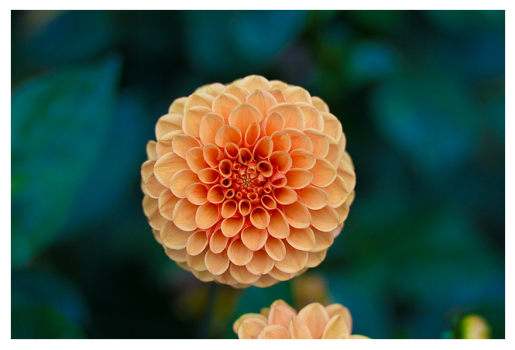

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

Kode ini digunakan untuk memuat dan menampilkan gambar bunga menggunakan pustaka `sklearn`. Pertama, fungsi `load_sample_image()` diimpor dari `sklearn.datasets` untuk memuat gambar contoh yang bernama "flower.jpg".

Setelah gambar dimuat, objek `ax` dibuat untuk menyediakan area plot tanpa sumbu x dan y (dengan mengatur `xticks=[]` dan `yticks=[]`), sehingga hanya gambar yang ditampilkan tanpa gangguan dari skala sumbu. Terakhir, metode `imshow()` dipanggil pada objek `ax` untuk menampilkan gambar bunga yang telah dimuat. Hasil akhirnya adalah tampilan gambar bunga dalam plot yang bersih, tanpa informasi tambahan dari sumbu.

In [ ]:
flower.shape

(427, 640, 3)

Kode flower.shape digunakan untuk mendapatkan dimensi dari gambar bunga yang telah dimuat sebelumnya. Fungsi ini akan mengembalikan sebuah tuple yang menunjukkan ukuran gambar dalam format (tinggi, lebar, saluran warna).

In [ ]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

Kode ini melakukan normalisasi dan penataan ulang (reshaping) pada gambar bunga yang telah dimuat sebelumnya. Pertama, gambar dinormalisasi dengan membagi setiap nilai piksel oleh 255.0 menggunakan `data = flower / 255.0`. Langkah ini mengubah rentang nilai piksel dari 0-255 menjadi 0-1, yang merupakan praktik umum dalam pemrosesan citra agar algoritma pembelajaran mesin lebih mudah dalam menangani data.

Setelah dinormalisasi, gambar diubah bentuknya menjadi dua dimensi dengan `data = data.reshape(427 * 640, 3)`. Di sini, setiap baris dalam array baru mewakili satu piksel, sedangkan kolomnya mewakili saluran warna (merah, hijau, dan biru). Dengan menghitung total jumlah piksel sebagai 427 * 640, jumlahnya menjadi 273440, dan setiap piksel memiliki 3 nilai untuk saluran warna.

Akhirnya, menggunakan `data.shape` akan mengembalikan dimensi array yang telah diubah, yang menunjukkan ada 273440 piksel dalam gambar, masing-masing dengan 3 nilai untuk saluran warna RGB. Ini memberikan informasi penting tentang struktur data gambar setelah proses normalisasi dan penataan ulang.

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

Fungsi `plot_pixels` digunakan untuk memvisualisasikan piksel dari gambar dengan membuat dua plot scatter yang menunjukkan hubungan antara saluran warna merah, hijau, dan biru. Fungsi ini menerima parameter `data` yang berisi nilai piksel, `title` untuk judul plot, `colors` untuk warna titik, dan `N` untuk jumlah piksel yang ditampilkan, dengan nilai default 10.000.

Dalam fungsi ini, piksel dipilih secara acak menggunakan `np.random.RandomState(0)`, dan nilai saluran warna diekstrak menjadi variabel `R`, `G`, dan `B`. Dua subplot dibuat: yang pertama menampilkan hubungan antara saluran merah dan hijau, sedangkan yang kedua menampilkan hubungan antara saluran merah dan biru. Setiap plot dilengkapi dengan label sumbu dan judul, sehingga memungkinkan analisis visual distribusi warna dalam gambar dengan jelas dan efektif.

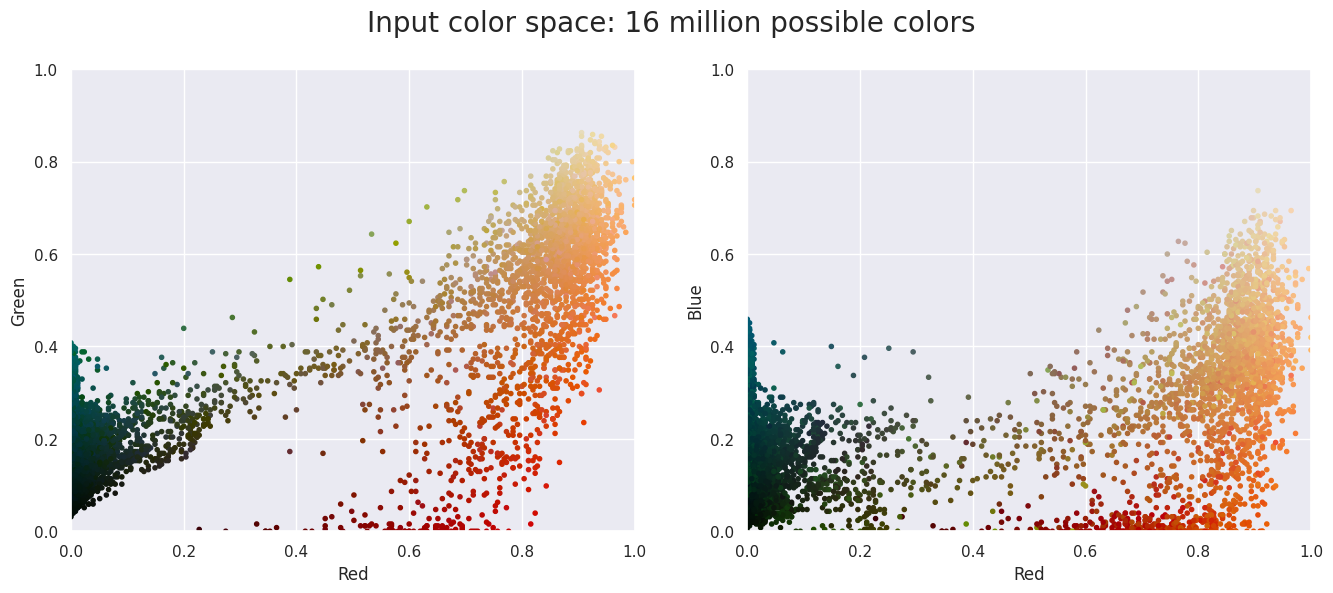

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

Dengan memanggil fungsi `plot_pixels(data, title='Input color space: 16 million possible colors')`, Anda akan menghasilkan visualisasi dari piksel-piksel dalam gambar yang menunjukkan ruang warna dengan 16 juta kemungkinan warna.

Fungsi ini akan memilih secara acak 10.000 piksel dari data gambar yang telah dinormalisasi sebelumnya dan akan menampilkan dua plot scatter. Plot pertama akan menunjukkan hubungan antara saluran warna merah dan hijau, sedangkan plot kedua akan menunjukkan hubungan antara saluran warna merah dan biru. Setiap titik pada plot akan memiliki warna yang sesuai dengan warna pikselnya, dan plot tersebut akan dilengkapi dengan label sumbu serta judul yang menyatakan bahwa ruang warna yang ditampilkan mencakup 16 juta kemungkinan warna. Visualisasi ini membantu dalam memahami distribusi warna dalam gambar dengan lebih baik.

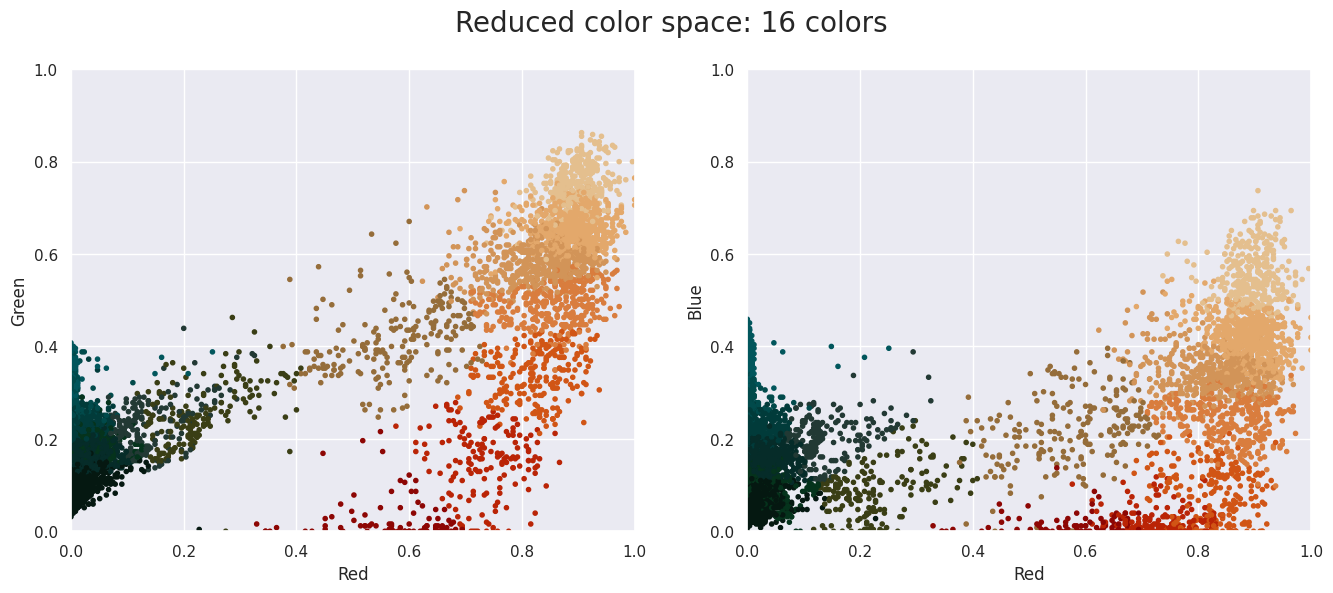

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

Kode di atas menggunakan `MiniBatchKMeans` untuk mengurangi jumlah warna dalam gambar menjadi 16 warna. Pertama, peringatan diabaikan dengan `warnings.simplefilter('ignore')` untuk menghindari gangguan dari masalah yang mungkin muncul terkait NumPy. Kemudian, `MiniBatchKMeans` diimpor, dan objek dibuat dengan parameter `n_clusters=16`, yang menunjukkan bahwa model ini akan mengelompokkan data warna ke dalam 16 kluster.

Setelah itu, model dilatih menggunakan `kmeans.fit(data)` dengan data warna yang telah dinormalisasi untuk menemukan pusat kluster warna yang optimal. Selanjutnya, warna baru dihasilkan melalui `new_colors = kmeans.cluster_centers_[kmeans.predict(data)]`, yang memprediksi kluster mana setiap piksel milik dan mengambil pusat kluster tersebut sebagai warna baru. Akhirnya, fungsi `plot_pixels` dipanggil untuk memvisualisasikan warna-warna baru yang dihasilkan dengan judul "Reduced color space: 16 colors," sehingga memungkinkan analisis visual yang lebih mudah terhadap palet warna yang disederhanakan.

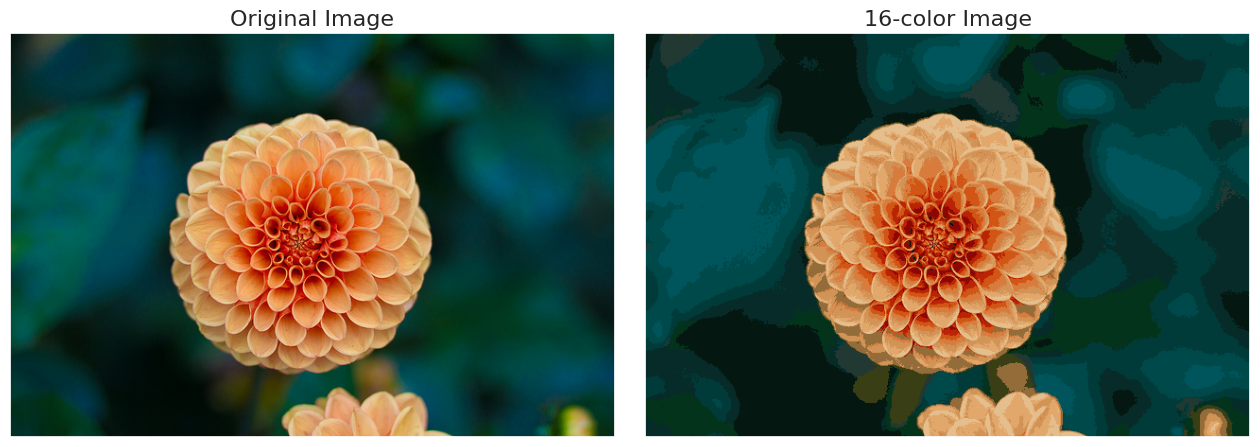

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

Kode di atas digunakan untuk mengubah gambar bunga menjadi versi yang memiliki 16 warna yang telah direduksi, kemudian memvisualisasikan kedua versi gambar tersebut untuk perbandingan.

Pertama, `flower_recolored = new_colors.reshape(flower.shape)` mengambil palet warna baru yang dihasilkan sebelumnya dan mengubah bentuknya agar sesuai dengan bentuk asli gambar bunga. Ini memungkinkan setiap piksel dalam gambar yang baru direduksi untuk memiliki warna sesuai dengan pusat kluster yang telah ditentukan.

Selanjutnya, dua subplot dibuat menggunakan `plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))` untuk menampilkan kedua gambar. Dengan pengaturan ini, gambar akan ditampilkan berdampingan, tanpa sumbu x dan y yang terlihat. Kemudian, gambar asli ditampilkan di subplot pertama dengan judul "Original Image," dan gambar yang telah direduksi warnanya ditampilkan di subplot kedua dengan judul "16-color Image."

#**Praktikum 3**

**Self-optimizing Map (SOM)**

**instalasi SOM**

In [66]:
pip install minisom

In [ ]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Kode di atas mengimpor pustaka yang diperlukan untuk menggunakan Self-Organizing Maps (SOM) dengan `MiniSom`, serta untuk manipulasi data dan visualisasi. `MiniSom` diimpor untuk membangun dan melatih model SOM, sementara NumPy digunakan untuk komputasi numerik dan pengelolaan array. Matplotlib, melalui modul pyplot, memungkinkan pengguna untuk membuat berbagai visualisasi data, sedangkan modul datasets dari Scikit-Learn menyediakan akses ke berbagai set data standar untuk pengujian algoritma. Secara keseluruhan, kode ini mempersiapkan lingkungan untuk menerapkan SOM pada dataset tertentu dan memvisualisasikan hasilnya.

In [ ]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

Kode di atas digunakan untuk memuat dataset Iris, yang merupakan salah satu dataset standar yang sering digunakan dalam machine learning dan analisis data. Pertama, `iris = datasets.load_iris()` memanggil fungsi `load_iris()` dari modul datasets Scikit-Learn, yang mengunduh dan menyimpan dataset Iris ke dalam variabel `iris`. Dataset ini berisi informasi tentang tiga spesies bunga iris dan empat fitur pengukuran: panjang sepal, lebar sepal, panjang petal, dan lebar petal.

Selanjutnya, `data = iris.data` mengekstrak bagian data dari objek `iris` dan menyimpannya dalam variabel `data`. Dengan cara ini, variabel `data` sekarang berisi array NumPy yang berisi fitur-fitur dari dataset Iris, yang dapat digunakan untuk analisis lebih lanjut, termasuk penerapan algoritma clustering atau klasifikasi.

In [ ]:
# Normalisasi data
data = data / data.max(axis=0)

Kode di atas melakukan normalisasi pada dataset Iris dengan membagi setiap elemen dalam array `data` dengan nilai maksimum di sepanjang setiap kolom (fitur). Dengan menggunakan `data.max(axis=0)`, kita mendapatkan nilai maksimum untuk setiap fitur dalam dataset, yang kemudian digunakan sebagai pembagi.

Normalisasi ini mengubah rentang nilai setiap fitur menjadi antara 0 dan 1, sehingga semua fitur memiliki skala yang sama. Proses ini penting dalam analisis data dan penerapan algoritma machine learning, terutama untuk algoritma yang sensitif terhadap skala fitur, seperti K-Means atau neural networks. Dengan normalisasi, kita dapat memastikan bahwa tidak ada fitur yang mendominasi hasil analisis hanya karena skala nilai yang lebih besar.

In [ ]:
# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

Kode di atas menginisialisasi Self-Organizing Map (SOM) menggunakan kelas `MiniSom`. Pertama, ukuran peta ditentukan sebagai 10 baris dan 10 kolom dengan `map_size = (10, 10)`, menghasilkan total 100 neuron. Kemudian, objek `som` dibuat dengan parameter yang mencakup dimensi peta, jumlah fitur data, serta nilai `sigma=0.5` yang mengontrol sebaran jangkauan neuron, dan `learning_rate=0.5` yang menentukan seberapa besar perubahan bobot selama pembelajaran. Dengan inisialisasi ini, SOM siap untuk dilatih dengan data yang telah dinormalisasi.

In [ ]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

Kode di atas digunakan untuk menginisialisasi bobot neuron dalam Self-Organizing Map (SOM) secara acak. Dengan memanggil `som.random_weights_init(data)`, bobot setiap neuron di peta SOM diatur ke nilai acak yang diambil dari distribusi yang sesuai dengan rentang nilai dalam dataset `data`.

Inisialisasi bobot secara acak penting dalam proses pelatihan SOM, karena memberikan titik awal yang beragam untuk pembelajaran. Dengan cara ini, neuron dapat belajar mengelompokkan data dengan lebih baik selama proses pembelajaran, karena mereka mulai dari konfigurasi yang tidak bias. Setelah inisialisasi ini, SOM siap untuk dilatih menggunakan data yang telah dinormalisasi sebelumnya.

In [ ]:
# Pelatihan SOM
num_epochs = 100
som.train_random(data, num_epochs)

Kode di atas digunakan untuk melatih Self-Organizing Map (SOM) dengan menggunakan metode pelatihan acak. Dengan `num_epochs = 100`, kita menentukan jumlah iterasi pelatihan yang akan dilakukan. Kemudian, `som.train_random(data, num_epochs)` memanggil metode `train_random()` untuk melatih SOM dengan dataset `data` selama 100 epoch.

Selama pelatihan, neuron di peta SOM akan memperbarui bobot mereka berdasarkan data input yang diberikan. Proses ini bertujuan untuk mengelompokkan data yang serupa sehingga neuron yang berdekatan di peta SOM akan merespons pola data yang serupa. Dengan pelatihan selama 100 epoch, diharapkan SOM dapat belajar dan mengorganisasi data secara efektif, menghasilkan representasi yang berguna untuk analisis lebih lanjut.

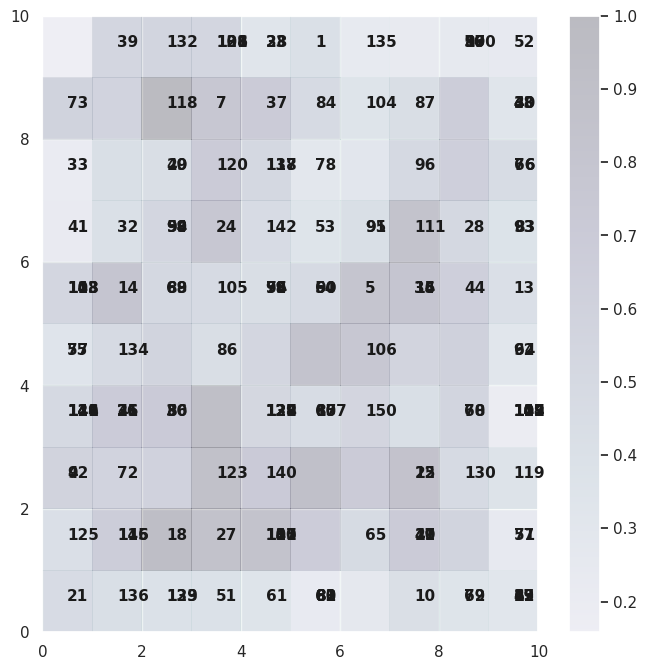

In [ ]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()

Kode di atas digunakan untuk memvisualisasikan hasil dari pelatihan Self-Organizing Map (SOM).

Pertama, `plt.figure(figsize=(8, 8))` mengatur ukuran gambar visualisasi. Dalam loop `for i, x in enumerate(data):`, setiap data point dalam `data` dianalisis untuk menemukan neuron pemenang dengan menggunakan metode `som.winner(x)`. Neuron pemenang adalah neuron yang paling dekat dengan input data point `x`. Kemudian, posisi neuron pemenang ditandai dalam peta dengan menggunakan `plt.text()`, di mana indeks data ditampilkan dengan font yang tebal dan berwarna hitam.

Selanjutnya, `plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)` digunakan untuk menampilkan peta jarak antara neuron, yang menggambarkan seberapa dekat neuron satu dengan yang lainnya. Peta jarak ini memberikan gambaran visual tentang struktur data yang telah dipelajari oleh SOM. Dengan `plt.colorbar()`, kita juga menambahkan bar warna untuk menunjukkan skala jarak.

Akhirnya, `plt.show()` menampilkan visualisasi, yang memungkinkan pengguna untuk melihat bagaimana data terdistribusi dan dikelompokkan di peta SOM.

#**Praktikum 4**

**Penerapan metode Self-Organizing Map (SOM) untuk segmentasi citra Lenna.**

**instalasi minisom**

In [55]:
pip install minisom

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

Kode di atas digunakan untuk mengimpor tiga pustaka Python yang umum dalam pemrosesan data dan analisis gambar. Pertama, **NumPy** diimpor dengan `import numpy as np`, yang berfungsi untuk operasi matematis dan manipulasi array. NumPy menyediakan struktur data yang efisien, seperti array multidimensi, serta berbagai fungsi untuk melakukan operasi numerik. Selanjutnya, **Matplotlib** diimpor dengan `import matplotlib.pyplot as plt`, yang merupakan pustaka untuk visualisasi data. Matplotlib memungkinkan pengguna membuat berbagai jenis grafik dan visualisasi, seperti plot garis, histogram, dan gambar, dengan kontrol yang mendetail terhadap elemen-elemen grafis. Terakhir, **scikit-image** diimpor dengan `from skimage import io`, yang merupakan bagian dari ekosistem scikit-learn yang berfokus pada pemrosesan citra. Modul `io` dalam scikit-image digunakan untuk membaca dan menulis gambar, memungkinkan pengguna memuat gambar dari file dan mengolahnya lebih lanjut. Dengan mengimpor pustaka ini, pengguna dapat melakukan analisis dan visualisasi data serta bekerja dengan gambar secara efisien dan efektif.

In [59]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

Kode di atas mendefinisikan fungsi `initialize_weights` yang digunakan untuk menginisialisasi bobot dalam Self-Organizing Map (SOM). Fungsi ini menerima dua parameter: `input_shape` dan `output_shape`. Parameter `input_shape` merepresentasikan dimensi dari data input yang akan diproses, sementara `output_shape` merepresentasikan dimensi dari peta SOM yang akan dibuat.

Di dalam fungsi, `np.random.rand()` digunakan untuk menghasilkan bobot acak. Fungsi ini menghasilkan array dengan ukuran sesuai dengan dimensi peta SOM, yaitu `output_shape[0]` dan `output_shape[1]`, dengan jumlah saluran yang sama dengan dimensi terakhir dari `input_shape`, yaitu `input_shape[2]`. Dengan demikian, fungsi ini mengembalikan bobot yang siap digunakan untuk pelatihan SOM, yang membantu peta dalam mengorganisasi dan mengelompokkan data yang diberikan.

In [60]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

Kode di atas mendefinisikan fungsi `calculate_distance` yang digunakan untuk menghitung jarak antara vektor input dan bobot dalam Self-Organizing Map (SOM). Fungsi ini menerima dua parameter: `input_vector`, yang merupakan vektor data yang akan dibandingkan, dan `weights`, yang adalah bobot dari peta SOM.

Di dalam fungsi, `np.linalg.norm()` digunakan untuk menghitung norma (jarak) antara `input_vector` dan `weights`. Dengan menyetel parameter `axis=2`, fungsi ini menghitung jarak secara terpisah untuk setiap dimensi bobot, sehingga menghasilkan array jarak untuk setiap elemen bobot di peta SOM. Hasil dari fungsi ini adalah matriks jarak, yang menunjukkan seberapa jauh setiap bobot dalam peta SOM dari vektor input yang diberikan. Jarak ini penting untuk menentukan neuron pemenang dalam proses pelatihan SOM, yaitu neuron yang paling dekat dengan vektor input.

In [61]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

Kode di atas mendefinisikan fungsi `find_winner_unit_in_image`, yang bertujuan untuk menemukan indeks unit pemenang dalam Self-Organizing Map (SOM). Unit pemenang adalah neuron yang memiliki bobot paling dekat dengan vektor input.

Fungsi ini menerima dua parameter: `input_vector`, yang merupakan vektor data yang akan dibandingkan, dan `weights`, yang merupakan bobot dari peta SOM.

Di dalam fungsi, pertama-tama `calculate_distance()` dipanggil untuk menghitung jarak antara `input_vector` dan `weights`, menghasilkan matriks jarak. Kemudian, `np.argmin(distances)` digunakan untuk menemukan indeks posisi dari nilai terkecil dalam matriks jarak, yang menunjukkan unit dengan bobot terdekat.

Terakhir, `np.unravel_index()` digunakan untuk mengubah indeks datar yang ditemukan menjadi indeks multidimensi sesuai dengan bentuk `distances`. Hasil dari fungsi ini adalah indeks dari unit pemenang, yang dapat digunakan dalam proses pembaruan bobot SOM.

In [62]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

Fungsi `update_weights` digunakan untuk memperbarui bobot dalam Self-Organizing Map (SOM) berdasarkan vektor input, indeks unit pemenang, laju pembelajaran, dan jari-jari lingkungan. Fungsi ini menerima lima parameter: `input_vector`, `weights`, `winner`, `learning_rate`, dan `neighborhood_radius`. Di dalam fungsi, jarak antara neuron dan unit pemenang dihitung, lalu pengaruh setiap neuron dihitung menggunakan rumus eksponensial berdasarkan jarak tersebut. Bobot SOM kemudian diperbarui dengan menambahkan pengaruh yang dikalikan dengan perbedaan antara `input_vector` dan `weights`, serta dikalikan dengan `learning_rate`. Proses ini membuat bobot unit pemenang dan neuron di sekitarnya mendekati vektor input, membantu SOM belajar dari data.

In [63]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

Fungsi `train_som` dirancang untuk melatih Self-Organizing Map (SOM) menggunakan citra input, dengan sejumlah epoch, laju pembelajaran awal, dan jari-jari lingkungan awal. Pertama, fungsi ini menentukan bentuk input citra dan ukuran SOM sesuai dengan jumlah saluran warna citra. Bobot SOM diinisialisasi menggunakan fungsi `initialize_weights`.

Selama setiap epoch, laju pembelajaran dan jari-jari lingkungan diperbarui secara eksponensial untuk menyesuaikan pembelajaran seiring berjalannya waktu. Selanjutnya, fungsi ini memproses setiap piksel citra; untuk setiap piksel, vektor input diambil, dan unit pemenang ditemukan menggunakan fungsi `find_winner_unit_in_image`. Kemudian, bobot SOM diperbarui berdasarkan vektor input, unit pemenang, laju pembelajaran, dan jari-jari lingkungan dengan menggunakan fungsi `update_weights`. Setelah selesai, bobot yang telah diperbarui dikembalikan sebagai hasil pelatihan.

In [64]:
# Load citra Lenna (Anda bisa mengganti ini dengan citra lain jika diperlukan)
Lenna_path = "/content/drive/MyDrive/Machine Learning/images/lena.jpg"
Lenna = io.imread(Lenna_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

Kode di atas memuat citra Lenna dari file bernama "Lenna.png" dan menormalkan intensitas pikselnya agar berada dalam rentang [0, 1]. Proses normalisasi ini dilakukan dengan membagi nilai piksel dengan 255.0, yang merupakan nilai maksimum untuk piksel warna dalam format 8-bit. Dengan cara ini, nilai-nilai piksel akan berada di antara 0 (hitam) dan 1 (putih), yang memudahkan pemrosesan citra dalam algoritma pembelajaran mesin, termasuk Self-Organizing Map (SOM).

In [65]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(Lenna, num_epochs, initial_learning_rate, initial_neighborhood_radius)

Pada kode ini, Self-Organizing Map (SOM) dilatih menggunakan citra Lenna. Proses pelatihan diatur untuk berlangsung selama 100 epoch dengan laju pembelajaran awal sebesar 0.1 dan jari-jari lingkungan awal sebesar 5. Fungsi `train_som` digunakan untuk melatih SOM dengan parameter tersebut, di mana citra Lenna yang telah dinormalisasi berfungsi sebagai data input. Setelah pelatihan selesai, bobot yang terlatih akan disimpan dalam variabel `trained_weights`, yang akan digunakan untuk analisis lebih lanjut atau visualisasi hasil pemrosesan citra.

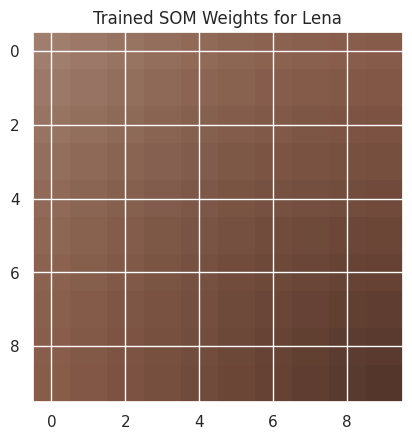

In [67]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Lena')
plt.show()

#Tugas Praktikum

**1. Gunakan data 'Mall_Customers.csv'**

**2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)**

**Jawab: fitur yang saya gunakan yaitu Annual Income dan Spending Score (1-100)**

**3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.**

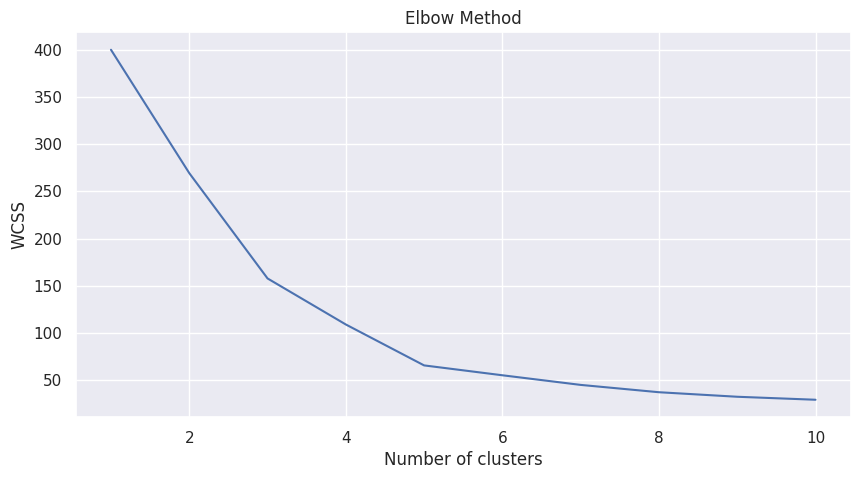

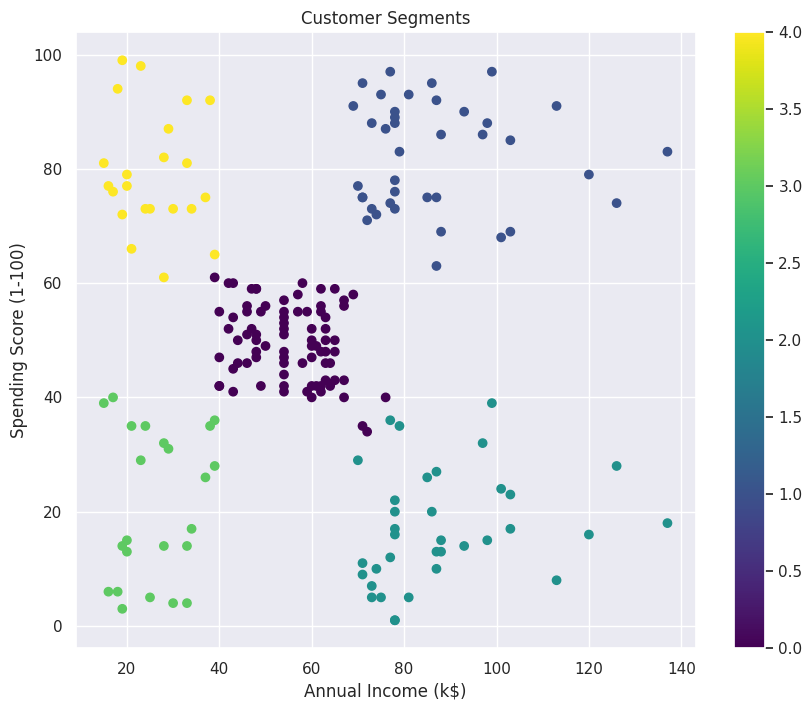

Optimal number of clusters: 5
Cluster centers:
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/assets/Mall_Customers.csv')

# Select features
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow curve, let's choose the optimal number of clusters
optimal_clusters = 5  # This should be determined by observing the elbow point

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=cluster_labels, cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(scatter)
plt.show()

print(f"Optimal number of clusters: {optimal_clusters}")
print("Cluster centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

**4. Buatlah  implementasi model SOM untuk segmentasi citra lain**

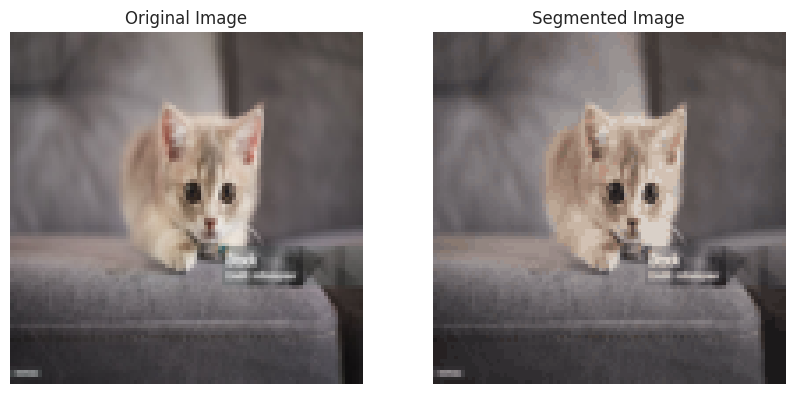

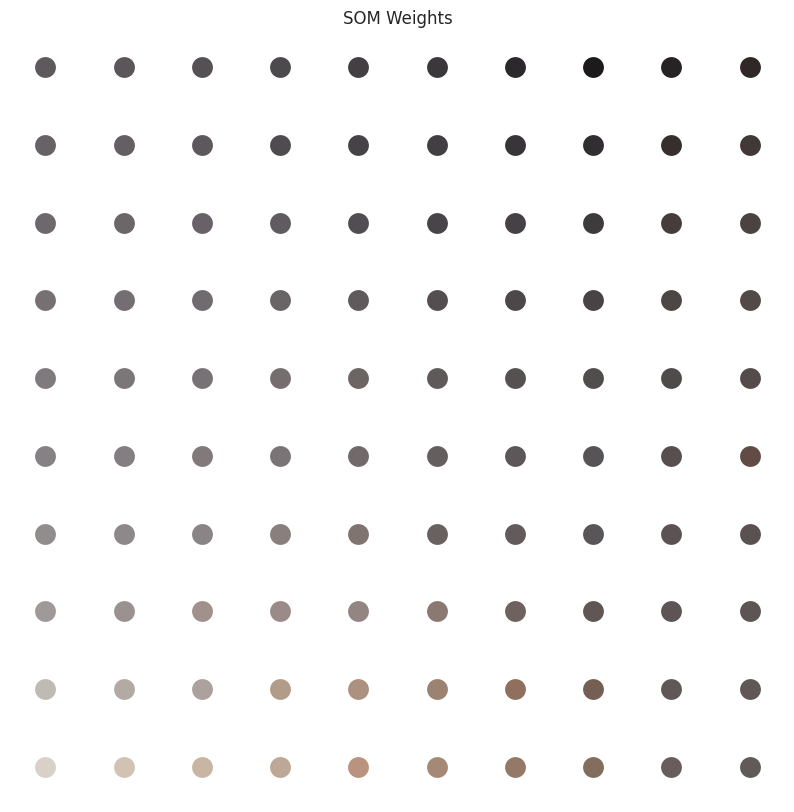

In [57]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
from PIL import Image

# Load and preprocess the image
image_path = '/content/drive/MyDrive/Machine Learning/images/Kitten.jpg'  # Replace with your image path
image = Image.open(image_path)
image = image.resize((100, 100))  # Resize for faster processing
pixels = np.array(image)
pixels = pixels.reshape(-1, 3) / 255.0  # Normalize pixel values

# Initialize and train SOM
som_shape = (10, 10)  # 10x10 SOM grid
som = MiniSom(som_shape[0], som_shape[1], 3, sigma=1.0, learning_rate=0.5)
som.train_random(pixels, 10000)  # Train for 10000 iterations

# Get the segmented image
segmented = np.zeros(pixels.shape)
for i, pixel in enumerate(pixels):
    winner = som.winner(pixel)
    segmented[i] = som.get_weights()[winner]

# Reshape back to image dimensions
segmented = segmented.reshape(image.size[1], image.size[0], 3)

# Visualize results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(image)
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(segmented)
ax2.set_title('Segmented Image')
ax2.axis('off')
plt.show()

# Visualize SOM weights
fig, ax = plt.subplots(figsize=(10, 10))
weights = som.get_weights()
for i in range(som_shape[0]):
    for j in range(som_shape[1]):
        ax.plot(i, j, 'o', markerfacecolor=weights[i, j], markersize=15, markeredgewidth=0)
ax.set_title('SOM Weights')
ax.axis('off')
plt.show()